In [1]:
import pandas as pd
import numpy as np

cols = ['symboling', 'normalized-losses', 'make', 'fuel-type',
        'aspiration', 'num-of-doors', 'body-style', 'drive-wheels',
        'engine-location', 'wheel-base', 'length', 'width',
        'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
        'engine-size', 'fuel-system', 'bore', 'stroke', 
        'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg',
        'highway-mpg', 'price']

cars = pd.read_csv('imports-85.data', names=cols)
cars.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [2]:
cars.replace(to_replace='?', value=np.nan, inplace=True)
numeric_cols = ['normalized-losses', 'wheel-base', 'length',
                'width', 'height', 'curb-weight', 'engine-size',
                'bore', 'stroke', 'compression-rate',
                'horsepower', 'peak-rpm', 'city-mpg',
                'highway-mpg', 'price']

cars = cars[numeric_cols].astype('float')
avg_nl = np.mean(cars['normalized-losses'])
cars['normalized-losses'].fillna(avg_nl, inplace=True)
cars.dropna(subset=['price'])
cars.fillna(cars.mean(), inplace=True)
print(cars.isnull().sum())

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64


In [3]:
from sklearn import preprocessing

price = cars['price']
min_max_scaler = preprocessing.MinMaxScaler()
cars_scaled = min_max_scaler.fit_transform(cars)
cars_normalized = pd.DataFrame(cars_scaled, columns=numeric_cols)
cars_normalized['price'] = price
cars_normalized.head(5)

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.316667,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.433333,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.491667,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.508333,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,0.138889,0.157895,17450.0


In [4]:
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def uni_knn_train_test(features, target, df, k):
    # Shuffle the dataframe rows
    np.random.seed(1)
    shuf_idx = np.random.permutation(df.index)
    df_r = df.reindex(shuf_idx)
    
    # Split the dataset into a train and test set on 70%
    percent_70 = int(round(df_r.shape[0] * 0.5))
    train_df = df_r.iloc[:percent_70]
    test_df = df_r.iloc[percent_70:]
    
    # Instantiate model, fit data, make predictions and compute
    # error
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[features]], train_df[target])
    predictions = knn.predict(test_df[[features]])
    rmse = (mean_squared_error(test_df[target], predictions)) ** (1/2)
    return rmse

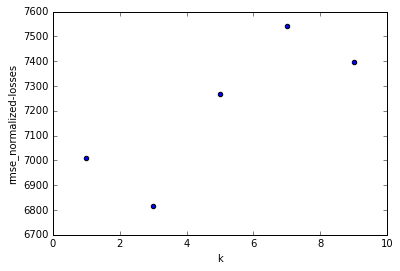

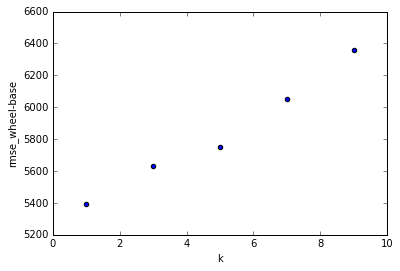

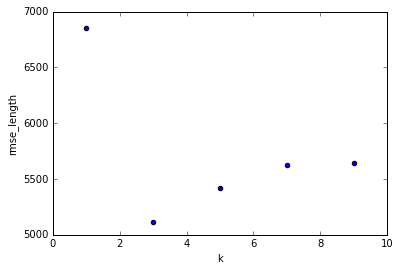

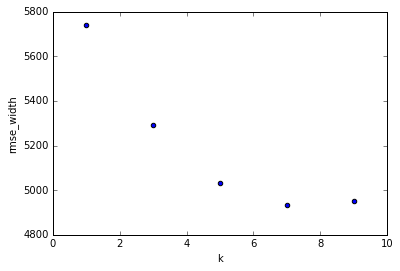

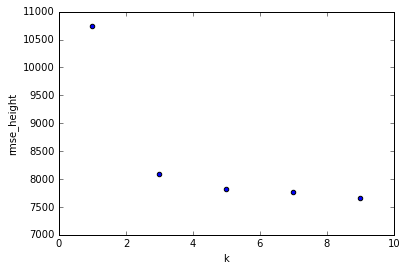

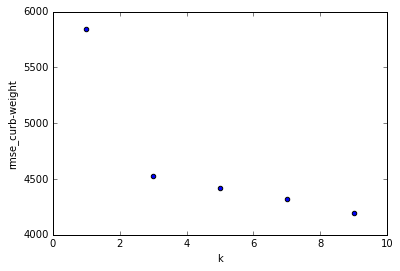

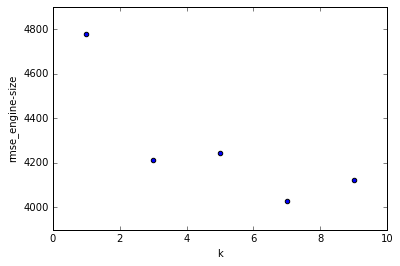

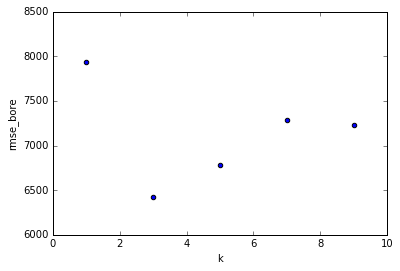

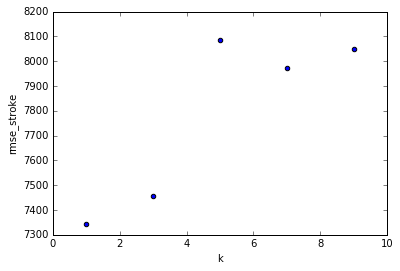

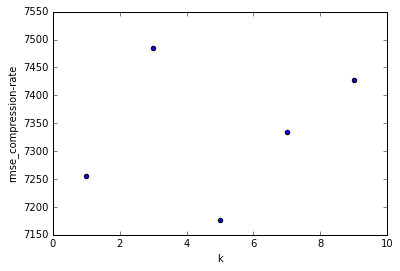

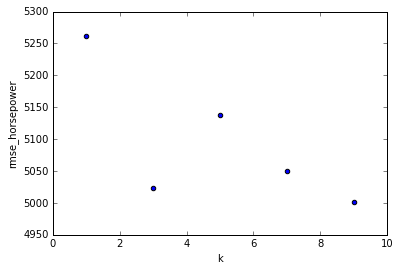

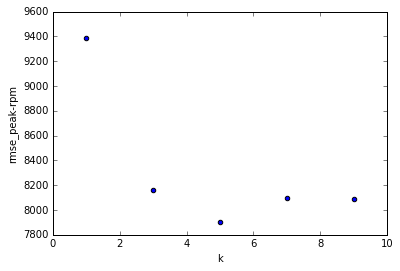

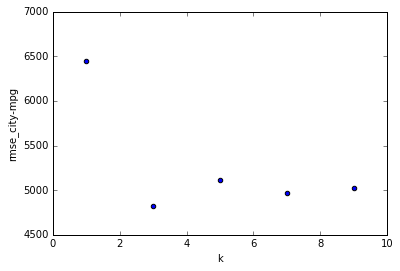

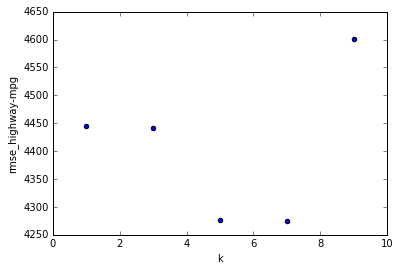

In [5]:
numeric_cols.remove('price')
k_values = [1, 3, 5, 7, 9]
rmse_dict = dict()

for col in numeric_cols:
    col_rmse = dict()
    rmse_dict[col] = col_rmse
    for k in k_values:
        col_rmse[k] = uni_knn_train_test(
                                col, 'price', cars_normalized, k)

    plt.scatter(list(col_rmse.keys()), list(col_rmse.values()))
    plt.xlabel('k')
    plt.ylabel('rmse_' + col)
    plt.show()

In [6]:
def knn_train_test(features, target, df, k):
    # Shuffle the dataframe rows
    np.random.seed(1)
    shuf_idx = np.random.permutation(df.index)
    df_r = df.reindex(shuf_idx)
    
    # Split the dataset into a train and test set on 70%
    percent_70 = int(round(df_r.shape[0] * 0.5))
    train_df = df_r.iloc[:percent_70]
    test_df = df_r.iloc[percent_70:]
    
    # Instantiate model, fit data, make predictions and compute
    # error
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[features], train_df[target])
    predictions = knn.predict(test_df[features])
    rmse = (mean_squared_error(test_df[target], predictions)) ** (1/2)
    return rmse

In [7]:
best_features = dict()
for feature,k_rmses in rmse_dict.items():
    # k_rmses.values
    best_features[feature] = np.mean(list(k_rmses.values()))
best_features = pd.Series(best_features)
best_features = best_features.sort_values()
best_features

engine-size          4276.956498
highway-mpg          4407.780148
curb-weight          4662.625973
horsepower           5094.780464
width                5189.360872
city-mpg             5272.943666
length               5729.508385
wheel-base           5835.896173
bore                 7130.973272
normalized-losses    7205.749824
compression-rate     7335.788011
stroke               7781.497975
peak-rpm             8328.240360
height               8412.570961
dtype: float64

Index(['engine-size', 'highway-mpg'], dtype='object')
Index(['engine-size', 'highway-mpg', 'curb-weight'], dtype='object')
Index(['engine-size', 'highway-mpg', 'curb-weight', 'horsepower'], dtype='object')
Index(['engine-size', 'highway-mpg', 'curb-weight', 'horsepower', 'width'], dtype='object')


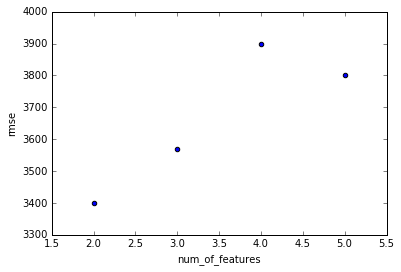

In [8]:
best_feat_num = [2, 3, 4, 5]
for n in best_feat_num:
    print(best_features.index[:n])
    rmse = knn_train_test(best_features.index[:n], 'price', cars_normalized, 5)
    
    plt.scatter(n, rmse)
    plt.xlabel('num_of_features')
    plt.ylabel('rmse')

plt.show()

In [9]:
best_models_num_feat = [2, 3, 5]
k_values = list(range(1,26,1))

final_dict = dict()
for n in best_models_num_feat:
    n_model_dict = dict()
    for k in k_values:
        n_model_dict[k] = knn_train_test(best_features.index[:n],
                                         'price', cars_normalized,
                                         k)
    final_dict[str(n) + " best features"] = pd.Series(n_model_dict).sort_values()

print(final_dict)

{'2 best features': 5     3399.363252
6     3507.545093
4     3516.379788
3     3531.110793
2     3685.288429
7     3725.655218
9     3799.320289
8     3839.312911
10    3863.396642
1     4022.874086
11    4097.418723
12    4160.536668
14    4220.358496
13    4254.125450
15    4261.006998
16    4382.008390
17    4501.642503
18    4622.447354
19    4667.894753
21    4711.269546
20    4715.040360
22    4772.074217
23    4845.365830
24    4883.260508
25    4906.978217
dtype: float64, '3 best features': 5     3570.511592
3     3631.195258
6     3632.453141
2     3637.594322
7     3776.248378
4     3852.544028
8     3863.335709
9     3998.967209
10    4096.564138
1     4143.620686
12    4154.751199
11    4185.617527
13    4311.256525
14    4445.041740
15    4561.230324
17    4606.348585
16    4634.702314
18    4707.686001
19    4762.729930
20    4828.265686
21    4862.598290
22    4887.670767
24    4928.405428
23    4937.171340
25    4942.654679
dtype: float64, '5 best features': 2     3578